In [52]:
import numpy as np
I=16
J=16
T = 50
Steplen = 0.1
ii = range(T)
ii = np.asarray(ii)
T_ =(ii[:]*Steplen)
Onsager= I*J*(1-np.sinh(2/T_)**(-4))**0.125
for i in range(len(Onsager)):
    if np.isnan(Onsager[i]):
        Onsager[i]=0

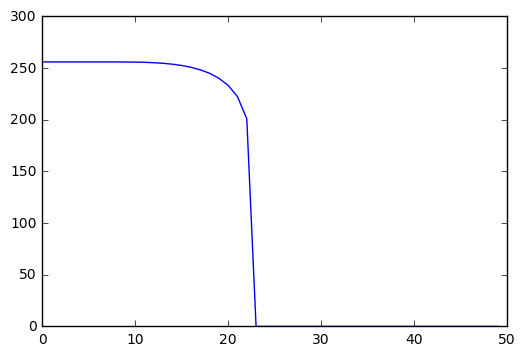

In [3]:
import matplotlib.pyplot as plt
plt.plot(Onsager)
plt.show()

In [19]:
import random
N = I*J
cycle = 1000
aa = np.zeros((I,J))
for i in range(I):
    for j in range(J):
        if random.uniform(0,1)<=0.5:
            aa[i,j]=1
        else:
            aa[i,j]=-1
Error_t = np.zeros((T,I*J*cycle))
for t in range(T):
    sigma = Onsager[t]
    Prob_big = (N-sigma)/2/N
    Prob_small = 1-Prob_big
    for w in range(I*J*cycle):
        i = int(np.round((I-1)*random.uniform(0,1)))
        j = int(np.round((J-1)*random.uniform(0,1)))
        if aa[i,j]==1:
            if random.uniform(0,1)<=Prob_big:
                aa[i,j] = -aa[i,j]
        else:
            if random.uniform(0,1)<=Prob_small:
                aa[i,j] = -aa[i,j]
        Error_t[t,w] += (np.sum(aa)-Onsager[t])

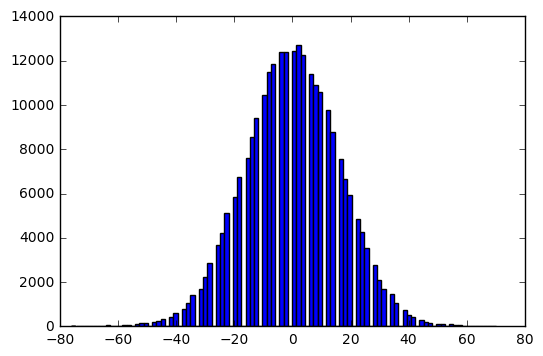

In [21]:
plt.hist(Error_t[49],100)
plt.show()

In [22]:
stddev = []
for t in range(T):
    stddev.append(np.std(Error_t[t]))
stddev = np.asarray(stddev)

In [23]:
'''Now for given T, we may use the Onsager solution and the stddev above to sample an magnetic moment every time'''

'Now for given T, we may use the Onsager solution and the stddev above to sample an magnetic moment every time'

In [25]:
stddev[0]=0# for initialization error

In [207]:
import numpy as np
import keras
import matplotlib.pyplot as plt  
from scipy.stats import norm  
from keras import optimizers
from keras.layers import Input, Dense, Lambda  
from keras.models import Model  
from keras import backend as K  
from keras import objectives  
from keras.datasets import mnist  
from keras.utils.vis_utils import plot_model  
import sys
 
original_dim = 1  
output_dim = 256
latent_dim = 1
intermediate_dim = 512
batch_size = 100
nb_epoch = 50  
epsilon_std = 1.0  
 
#encoding  
M = Input(shape=(original_dim,))  

#Gauss sampling,sample Z  
#def sampling(args):   
#    T = args  
#    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0.,stddev=epsilon_std)
#    return Onsager_func(T) + STD_DEV(T)* epsilon



#M = Lambda(sampling, output_shape=(latent_dim,))(Temp)

decoder_h = Dense(intermediate_dim, activation='relu',kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.2, seed=None))(M)
#decoder_h = Dense(intermediate_dim, activation='relu')(decoder_h) 
decoded = Dense(output_dim, activation='sigmoid')(decoder_h)



def ae_loss(x, decoded):  
    xent_loss =K.sum(K.square(K.sum(x,axis=-1)-K.sum(decoded,axis=-1)))
    constrain_loss = -K.sum(K.square(decoded-0.5))
    return xent_loss + constrain_loss

def gen_loss(M, decoded):  
    xent_loss =K.sum(K.square( M/2+128             - K.sum(decoded,axis=-1)))
    constrain_loss = -K.sum(K.square(decoded-0.5))
    return xent_loss + constrain_loss

#def gen_loss(M, decoded) ,what's the difference?


gen = Model(M, decoded)

sgd = optimizers.SGD(lr=0.1, clipvalue=0.5)
RMSprop = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

gen.compile(optimizer='RMSprop', loss=gen_loss)  

data_T =[]
for i in range(50):
    data_T.append(i)
data_T = np.asarray(data_T)

def sampling(args):   
    T = args  
    epsilon = np.random.normal()
    return Onsager[T] + stddev[T]* epsilon
data_M = []
for i in range(50):
    for j in range(100):
        data_M.append(sampling(i))
data_M = np.asarray(data_M)

index = [i for i in range(len(data_M))]
random.shuffle(index)
data_M = data_M[index]
x_train = data_M[:4000]
x_test = data_M[4000:]

In [208]:
gen.fit(x_train, x_train,  
        shuffle=True,  
        nb_epoch=nb_epoch,  
        #verbose=2,  
        batch_size=100,  
        validation_data=(x_test, x_test))  

/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 0s - loss: 41296498.5000 - val_loss: 39990056.0000
Epoch 2/50
4000/4000 [==============================] - 0s - loss: 39485044.2000 - val_loss: 39528450.4000
Epoch 3/50
4000/4000 [==============================] - 0s - loss: 39245867.2000 - val_loss: 39399278.0000
Epoch 4/50
4000/4000 [==============================] - 0s - loss: 39101763.2000 - val_loss: 39342182.0000
Epoch 5/50
4000/4000 [==============================] - 0s - loss: 39086712.2000 - val_loss: 39358711.2000
Epoch 6/50
4000/4000 [==============================] - 0s - loss: 39082559.6000 - val_loss: 39357761.2000
Epoch 7/50
4000/4000 [==============================] - 0s - loss: 39079087.9000 - val_loss: 39343415.6000
Epoch 8/50
4000/4000 [==============================] - 0s - loss: 39077088.1000 - val_loss: 39342996.0000
Epoch 9/50
4000/4000 [==============================] - 0s - loss: 39077277.7000 - val_loss: 393

KeyboardInterrupt: 

M of i is: 211.549790058
Plot is: 114.0
M of i is: -21.659958562
Plot is: 114.0
M of i is: 256.09951441
Plot is: 114.0
M of i is: 0.857844773849
Plot is: 114.121
M of i is: -23.0036436094
Plot is: 114.0
M of i is: -16.2085631372
Plot is: 114.0
M of i is: 189.387859633
Plot is: 114.0
M of i is: 18.8976320784
Plot is: 114.0
M of i is: 22.7406472161
Plot is: 114.0


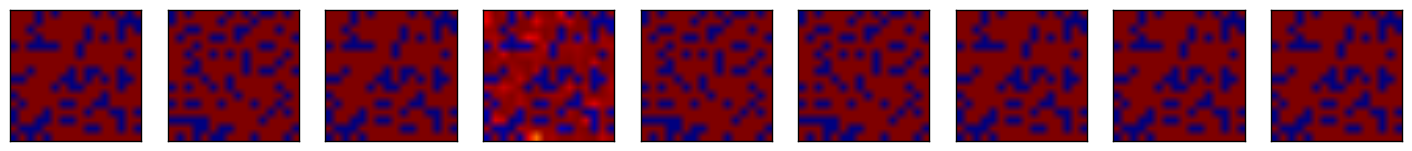

In [206]:
decoded_imgs = gen.predict(x_test,batch_size=100)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(1,n):
    print("M of i is:",x_test[i])
    print("Plot is:",(np.sum((decoded_imgs[i]*2-1),axis=-1)))
    ax = plt.subplot(2, n ,i + n)
    plt.imshow((decoded_imgs[i].reshape(16,16)))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [150]:
'''try transfer learning'''

'try transfer learning'

In [194]:
'''''This script demonstrates how to build a variational autoencoder with Keras. 
 
Reference: "Auto-Encoding Variational Bayes" https://arxiv.org/abs/1312.6114 
'''  
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.stats import norm  
from keras.initializers import VarianceScaling,RandomNormal
from keras.layers import Input, Dense, Lambda  
from keras.models import Model  
from keras import backend as K  
from keras import objectives  
from keras.datasets import mnist  
from keras.utils.vis_utils import plot_model  
import sys  
  

batch_size = 100  
original_dim = 256   
latent_dim = 1   
intermediate_dim = 128
nb_epoch = 50  
epsilon_std = 1.0  
  
#my tips:encoding  
x = Input(shape=(original_dim,))  
h = Dense(intermediate_dim, activation='relu')(x)  
encoded  = Dense(latent_dim,kernel_initializer=RandomNormal(mean=0, stddev=0.2, seed=None))(h)  

 
decoder_h = Dense(intermediate_dim, activation='relu')(encoded) 
decoded = Dense(original_dim, activation='sigmoid')(decoder_h)




def ae_loss(x, decoded):  
    xent_loss =K.sum(K.square(K.sum(x,axis=-1)-K.sum(decoded,axis=-1)))
    constrain_loss = -K.sum(K.square(decoded-0.5))
    return xent_loss + constrain_loss

ae = Model(x, decoded) 
import keras
EarlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')

ae.compile(optimizer='rmsprop', loss=ae_loss)

newdata = pd.read_csv("ISING_simul/IsingModel16_16simul.csv").values


for i in range(len(newdata)):
    for j in range(len(newdata[0])):
        newdata[i][j] = (newdata[i][j]+1)/2
index = [i for i in range(len(newdata))]
import random
random.shuffle(index)
newdata = newdata[index]
x_train = newdata[:15000]
x_test = newdata[15000:20000]





In [195]:
ae.fit(x_train, x_train,  
        shuffle=True,  
        nb_epoch=nb_epoch,  
        #verbose=2,  
        batch_size=100,  
        validation_data=(x_test, x_test),callbacks=[EarlyStopping])  

/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 15000 samples, validate on 5000 samples
Epoch 1/50
15000/15000 [==============================] - 1s - loss: 232860.2425 - val_loss: 11848.3195
Epoch 2/50
15000/15000 [==============================] - 0s - loss: 10650.4589 - val_loss: 30398.7004
Epoch 3/50
15000/15000 [==============================] - 0s - loss: 6977.0216 - val_loss: 3597.8181
Epoch 4/50
15000/15000 [==============================] - 0s - loss: 5101.9037 - val_loss: 137.3794
Epoch 5/50
15000/15000 [==============================] - 0s - loss: 4314.6299 - val_loss: 659.3505
Epoch 6/50
15000/15000 [==============================] - 0s - loss: 3718.1066 - val_loss: 5476.5799
Epoch 7/50
15000/15000 [==============================] - 0s - loss: 3465.6697 - val_loss: -701.7197
Epoch 8/50
15000/15000 [==============================] - 0s - loss: 2846.5221 - val_loss: 7094.4184
Epoch 9/50
15000/15000 [==============================] - 0s - loss: 2385.7207 - val_loss: -460.7731
Epoch 10/50
15000/15000 [==============

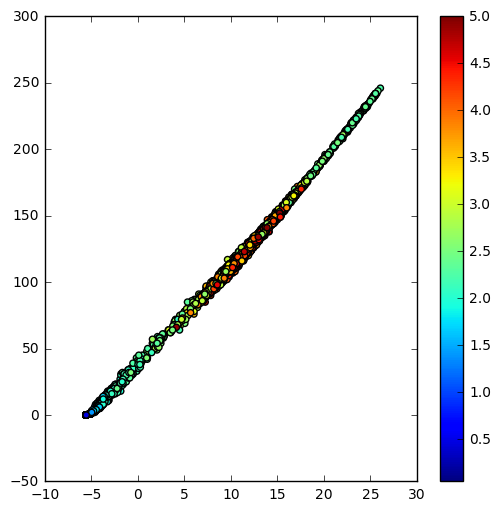

In [196]:
T = np.zeros((20099,))
u=5.025
for i in range(20099):
    
    if i%101==0:
        u = u- 0.025
    T[i]=u
T = T[index]

T_train = T[:15000]
T_test = T[15000:20000]
y_test = np.zeros((len(x_test),))
for i in range(len(x_test)):
    y_test[i]= np.sum(x_test[i])

encoder = Model(x, encoded)
  
# display a 2D plot of the digit classes in the latent space  
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)  
plt.figure(figsize=(6, 6))  
plt.scatter( x_test_encoded[:, 0] ,y_test, c=T_test)  
plt.colorbar()  
plt.show()  



In [197]:
ae.weights

[<tf.Variable 'dense_78/kernel:0' shape=(256, 128) dtype=float32_ref>,
 <tf.Variable 'dense_78/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'dense_79/kernel:0' shape=(128, 1) dtype=float32_ref>,
 <tf.Variable 'dense_79/bias:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'dense_80/kernel:0' shape=(1, 128) dtype=float32_ref>,
 <tf.Variable 'dense_80/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'dense_81/kernel:0' shape=(128, 256) dtype=float32_ref>,
 <tf.Variable 'dense_81/bias:0' shape=(256,) dtype=float32_ref>]

In [222]:
import numpy as np
import keras
import matplotlib.pyplot as plt  
from scipy.stats import norm  
from keras import optimizers
from keras.layers import Input, Dense, Lambda  
from keras.models import Model  
from keras import backend as K  
from keras import objectives  
from keras.datasets import mnist  
from keras.utils.vis_utils import plot_model  
import sys
 
original_dim = 1  
output_dim = 256
latent_dim = 1
intermediate_dim = 128
batch_size = 100
nb_epoch = 50  
epsilon_std = 1.0  
 
#encoding  
M = Input(shape=(original_dim,))
def div10(args):
    return args/10

z = Lambda(div10, output_shape=(latent_dim,))(M)    
    
#Gauss sampling,sample Z  
#def sampling(args):   
#    T = args  
#    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0.,stddev=epsilon_std)
#    return Onsager_func(T) + STD_DEV(T)* epsilon



#M = Lambda(sampling, output_shape=(latent_dim,))(Temp)

decoder_h = Dense(intermediate_dim, activation='relu')(z)
#decoder_h = Dense(intermediate_dim, activation='relu')(decoder_h) 
decoded = Dense(output_dim, activation='sigmoid')(decoder_h)




def gen_loss(M, decoded):  
    xent_loss =K.sum(K.square( M/2+128             - K.sum(decoded,axis=-1)))
    constrain_loss = -K.sum(K.square(decoded-0.5))
    return xent_loss + 0*constrain_loss

#def gen_loss(M, decoded) ,what's the difference?


gen = Model(M, decoded)

sgd = optimizers.SGD(lr=0.1, clipvalue=0.5)
RMSprop = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

gen.compile(optimizer=RMSprop, loss=gen_loss)  
gen.set_weights(ae.get_weights()[4:8])
data_T =[]
for i in range(50):
    data_T.append(i)
data_T = np.asarray(data_T)

def sampling(args):   
    T = args  
    epsilon = np.random.normal()
    return Onsager[T] + stddev[T]* epsilon
data_M = []
for i in range(50):
    for j in range(100):
        data_M.append(sampling(i))
data_M = np.asarray(data_M)

index = [i for i in range(len(data_M))]
random.shuffle(index)
data_M = data_M[index]
x_train = data_M[:4000]
x_test = data_M[4000:]

In [223]:
gen.fit(x_train, x_train,  
        shuffle=True,  
        nb_epoch=nb_epoch,  
        #verbose=2,  
        batch_size=100,  
        validation_data=(x_test, x_test))  

/Users/sunhop/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 0s - loss: 140024466.2000 - val_loss: 126700833.6000
Epoch 2/50
4000/4000 [==============================] - 0s - loss: 115243790.8000 - val_loss: 100448276.0000
Epoch 3/50
4000/4000 [==============================] - 0s - loss: 87506221.8000 - val_loss: 72839558.4000
Epoch 4/50
4000/4000 [==============================] - 0s - loss: 60710509.2000 - val_loss: 50217183.2000
Epoch 5/50
4000/4000 [==============================] - 0s - loss: 43987581.9000 - val_loss: 40794440.8000
Epoch 6/50
4000/4000 [==============================] - 0s - loss: 39980794.7000 - val_loss: 39384729.2000
Epoch 7/50
4000/4000 [==============================] - 0s - loss: 39422410.5000 - val_loss: 39185570.0000
Epoch 8/50
4000/4000 [==============================] - 0s - loss: 39370633.4000 - val_loss: 39097433.6000
Epoch 9/50
4000/4000 [==============================] - 0s - loss: 39322628.0000 - val_loss:

M of i is: 255.87858444
Plot is: 114.374
M of i is: 249.272981601
Plot is: 114.38
M of i is: 254.575855881
Plot is: 114.375
M of i is: 251.720663836
Plot is: 114.378
M of i is: -25.8308939655
Plot is: 107.946
M of i is: 8.25233736957
Plot is: 112.191
M of i is: 255.913780917
Plot is: 114.374
M of i is: 3.31933244116
Plot is: 110.758
M of i is: 256.0
Plot is: 114.374


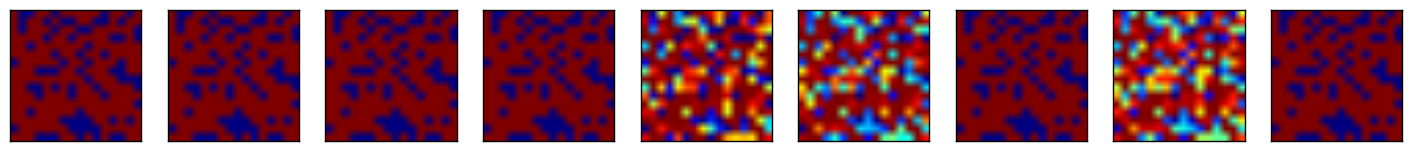

In [224]:
decoded_imgs = gen.predict(x_test,batch_size=100)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(1,n):
    print("M of i is:",x_test[i])
    print("Plot is:",(np.sum((decoded_imgs[i]*2-1),axis=-1)))
    ax = plt.subplot(2, n ,i + n)
    plt.imshow((decoded_imgs[i].reshape(16,16)))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()